# HEART DISEASES
---

![title](Pictures/Heart_Disease.jpg)

---

## DATA SET DESCRIPTION

The **Heart Disease Dataset** contains medical information from patients, with the goal of developing a classification model to predict the presence of heart disease based on clinical attributes.

### List of attributes

- **Age**: age of the patient (in years).
- **Sex**: binary indicator of the patient's gender (1 = male, 0 = female).
- **Chest Pain Type (cp)**: type of chest pain experienced by the patient (4 values).
- **Resting Blood Pressure (trestbps)**: resting blood pressure (in mm Hg).
- **Cholesterol (chol)**: serum cholesterol level (in mg/dl).
- **Fasting Blood Sugar (fbs)**: whether fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
- **Resting ECG Results (restecg)**: results of resting electrocardiogram.
- **Max Heart Rate (thalach)**: maximum heart rate achieved during exercise.
- **Exercise Induced Angina (exang)**: 1 = yes, 0 = no.
- **ST Depression (oldpeak)**: depression induced by exercise relative to rest.
- **Slope of ST Segment (slope)**: the slope of the peak exercise ST segment.
- **Number of Major Vessels (ca)**: number of major vessels colored by fluoroscopy (0–3).
- **Thalassemia (thal)**: 3 = normal, 6 = fixed defect, 7 = reversible defect.
- **Target**: binary classification target (1 = presence of heart disease, 0 = absence).


The goal is to analyze the relationships between patient characteristics and the presence of heart disease. This will be done training and evaluating classification models (LDA, QDA) and assessing differences in prediction performance between males and females (NB, KNN).


---

### Research Questions:

1. **Can heart disease be predicted accurately using basic clinical measurements such as cholesterol, blood pressure, and heart rate?**
 
2. **Does the predictive performance of classification models differ between males and females?**

3. **Are ST depression and maximum heart rate sufficient to detect heart disease patterns?**


In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm, chi2, f, t
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [5]:
df_full = pd.read_csv('heart.csv')

df_full.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Preprocessing 
---

In [7]:
# Drop unnecessary attributes
df = df_full.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Rename attributes
df = df.rename(columns={
    'trestbps': 'blood_pressure',
    'chol': 'cholesterol',
    'thalach': 'max_hr',
    'oldpeak': 'st_depression',
    'target': 'disease',
})


# Divide into train and test 
train, test = train_test_split(df, test_size=0.3, random_state=1)

df.head()

,age,blood_pressure,cholesterol,max_hr,st_depression,disease
0,52,125,212,168,1.0,0
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,0
4,62,138,294,106,1.9,0


## Data Visualization
---

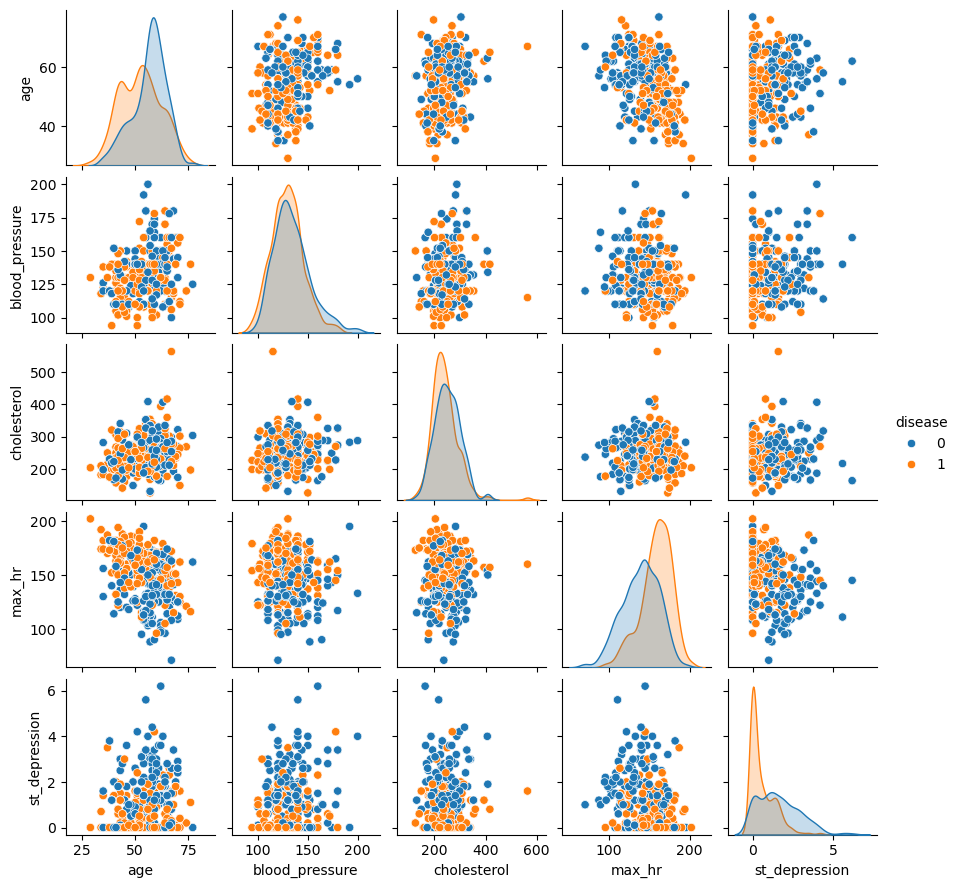

In [9]:
sns.pairplot(df, hue='disease', palette='tab10', height = 1.8);

## LDA: disease vs st_depression , max_hr
---

### Model
---

In [12]:
# Fix input and output
inp = ['st_depression', 'max_hr']
out = 'disease'

# Train an LDA model
lda = LinearDiscriminantAnalysis()

# Train LDA using only the training set
lda.fit(train[inp], train[out])

LinearDiscriminantAnalysis()

### Confusion Matrix
---

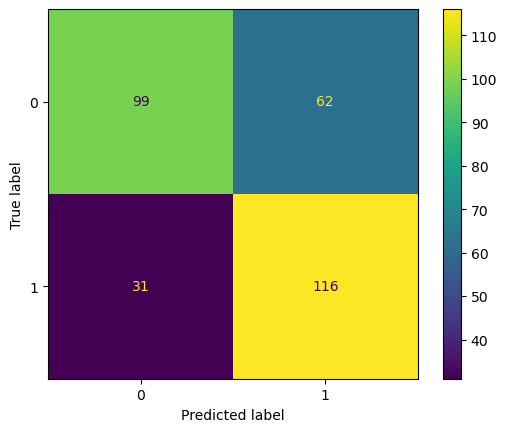

In [14]:
# Compute confussion matrix using test set

# Make predictions on test set: pass input variables
ypred = lda.predict(test[inp])

# True output
ytrue = test[out]

# Plot confusion matrix
cm = metrics.confusion_matrix(ytrue, ypred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=lda.classes_)
disp.plot()
plt.show()

### Performance indicators
---

- **Precision**: 65% of the times the model predicted a patient has the disease, the patient actually had the disease.  
- **Recall**: 79% of the times the patient had the disease, the model correctly predicted it.

---

In [17]:
rep = metrics.classification_report(ytrue, ypred)
print(rep)

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       161
           1       0.65      0.79      0.71       147

    accuracy                           0.70       308
   macro avg       0.71      0.70      0.70       308
weighted avg       0.71      0.70      0.70       308



### Decision Boundary
---

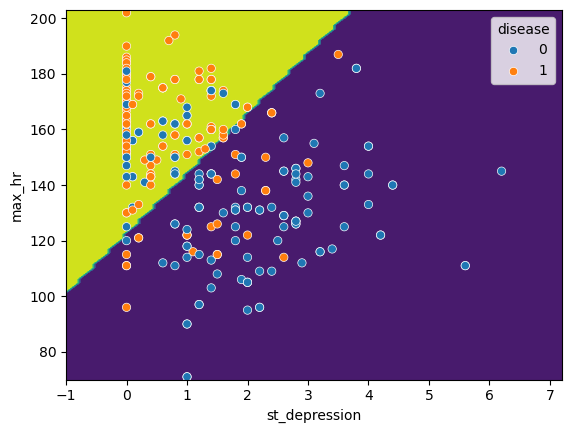

In [19]:
# Plot partioning of input space
DecisionBoundaryDisplay.from_estimator(lda, test[inp], response_method='predict')

# Plot test set
sns.scatterplot(x=inp[0], y=inp[1], hue=out, data=test);

## LDA FULL
---

### Model
---

In [22]:
# Fix input and output
inp_full = ['st_depression', 'max_hr', 'age', 'blood_pressure', 'cholesterol']
out = 'disease'

# Train an LDA model
lda_full = LinearDiscriminantAnalysis()

# Train LDA using only the training set
lda_full.fit(train[inp_full], train[out])

LinearDiscriminantAnalysis()

### Confusion Matrix
---

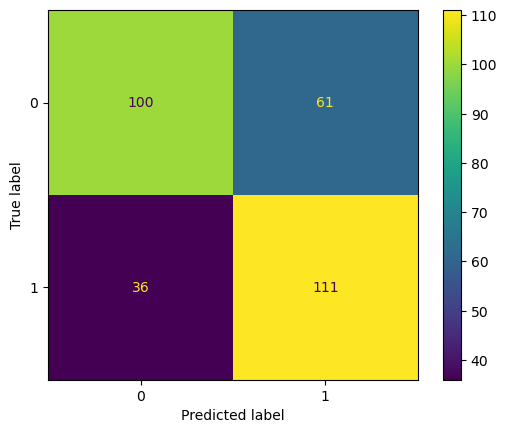

In [24]:
# Compute confussion matrix using test set

# Make predictions on test set: pass input variables
ypred1 = lda_full.predict(test[inp_full])

# Plot confusion matrix
cm = metrics.confusion_matrix(ytrue, ypred1)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=lda.classes_)
disp.plot()
plt.show()

### Performance indicators
---

- **Precision**: 65% of the times the model predicted a patient has the disease, the prediction was correct.  
- **Recall**: 76% of the times the patient truly had the disease, the model successfully detected it.

Compared to the simpler LDA model, the full model has slightly lower overall performance (accuracy = 69%). While recall for class 1 (disease) remains high, precision decreases, meaning more false positives are introduced. This trade-off suggests that adding more predictors does not necessarily improve model effectiveness and may lead to more noise.


In [27]:
rep = metrics.classification_report(ytrue, ypred1)
print(rep)

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       161
           1       0.65      0.76      0.70       147

    accuracy                           0.69       308
   macro avg       0.69      0.69      0.68       308
weighted avg       0.69      0.69      0.68       308



## QDA: disease vs st_depression , max_hr
---

### Model
---

In [30]:
# Train a QDA model
qda = QuadraticDiscriminantAnalysis()

# Train LDA using only the training set
qda.fit(train[inp], train[out])

QuadraticDiscriminantAnalysis()

### Confusion Matrix
---

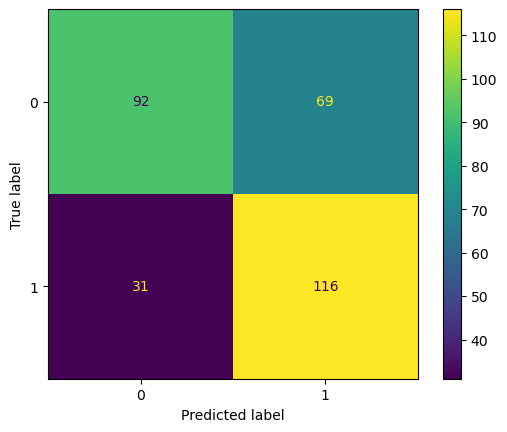

In [32]:
# Confusion Matrix
# Make predictions using test set
ypred2 = qda.predict(test[inp])

# Plot confusion matrix
cm = metrics.confusion_matrix(ytrue, ypred2)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=qda.classes_)
disp.plot()
plt.show()

### Performance indicators
---

- **Precision**: 63% of the times the model predicted disease, the prediction was correct.  
- **Recall**: 79% of the times the patient actually had the disease, the model detected it.

Compared to the LDA models, QDA achieves a similar recall for class 1 (disease), meaning it correctly identifies most diseased patients. However, it performs worse on class 0 (non-disease), with a lower recall of 57%, leading to many false positives.  

Overall accuracy is **68%**, slightly lower than both LDA models, suggesting that the quadratic boundary does not provide a significant advantage in this case.


In [35]:
rep2 = metrics.classification_report(ytrue, ypred2)
print(rep2)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       161
           1       0.63      0.79      0.70       147

    accuracy                           0.68       308
   macro avg       0.69      0.68      0.67       308
weighted avg       0.69      0.68      0.67       308



### Decision Boundary
---

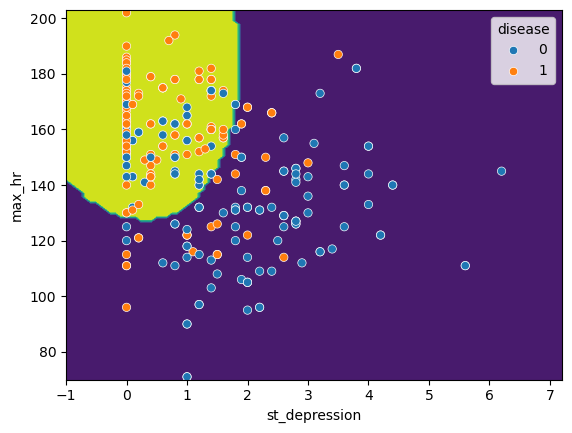

In [37]:
DecisionBoundaryDisplay.from_estimator(qda, test[inp], response_method='predict');

# plot test set
sns.scatterplot(x=inp[0], y=inp[1], hue=out, data=test);

## QDA FULL
---

### Model
---

In [40]:
# Train an LDA model
qda_full = QuadraticDiscriminantAnalysis()

# Train LDA using only the training set
qda_full.fit(train[inp_full], train[out])

QuadraticDiscriminantAnalysis()

### Confusion Matrix
---

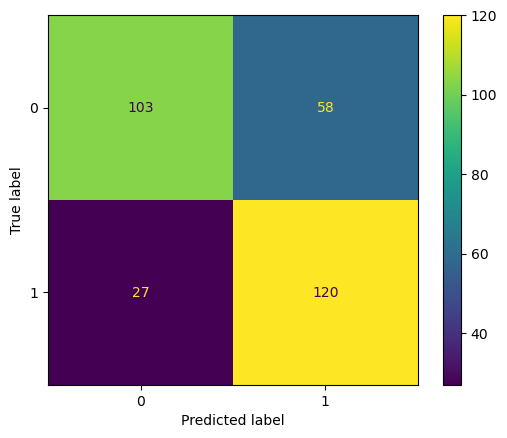

In [42]:
# Confusion Matrix
# Make predictions using test set
ypred3 = qda_full.predict(test[inp_full])


# Plot confusion matrix
cm = metrics.confusion_matrix(ytrue, ypred3)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=qda.classes_)
disp.plot()
plt.show()

### Performance indicators
---

- **Precision**: 67% of the times the model predicted disease, it was correct.  
- **Recall**: 82% of the times the patient had the disease, the model correctly identified it.

The QDA model trained on all predictors achieves the best **recall** among all models, making it the most effective at identifying true positive cases (diseased patients).  
It also improves in **overall accuracy** (72%). However, the precision for class 1 remains moderate (0.67), meaning that some healthy individuals are still incorrectly classified as diseased.


In [45]:
# Performance indicator
rep = metrics.classification_report(ytrue, ypred3)
print(rep)

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       161
           1       0.67      0.82      0.74       147

    accuracy                           0.72       308
   macro avg       0.73      0.73      0.72       308
weighted avg       0.74      0.72      0.72       308



## NB: Disease vs st_depression, max_hr
---

### Models
---

In [48]:
# Split hte dataset between male and female (male = 1, female = 0)
df_male = df[df_full['sex'] == 1].copy()
df_female = df[df_full['sex'] == 0].copy()

# Train-test split for male dataset 
train_male, test_male = train_test_split(df_male, test_size=0.3, random_state=1)

# Train-test split for male dataset
train_female, test_female = train_test_split(df_female, test_size=0.3, random_state=1)

# Train the model for male 
nb_male= GaussianNB()
nb_male.fit(train_male[inp], train_male[out]) 


GaussianNB()

In [49]:
# Train the model for female 
nb_female= GaussianNB()
nb_female.fit(train_female[inp], train_female[out]) 

GaussianNB()

### Confusion Matrix
---

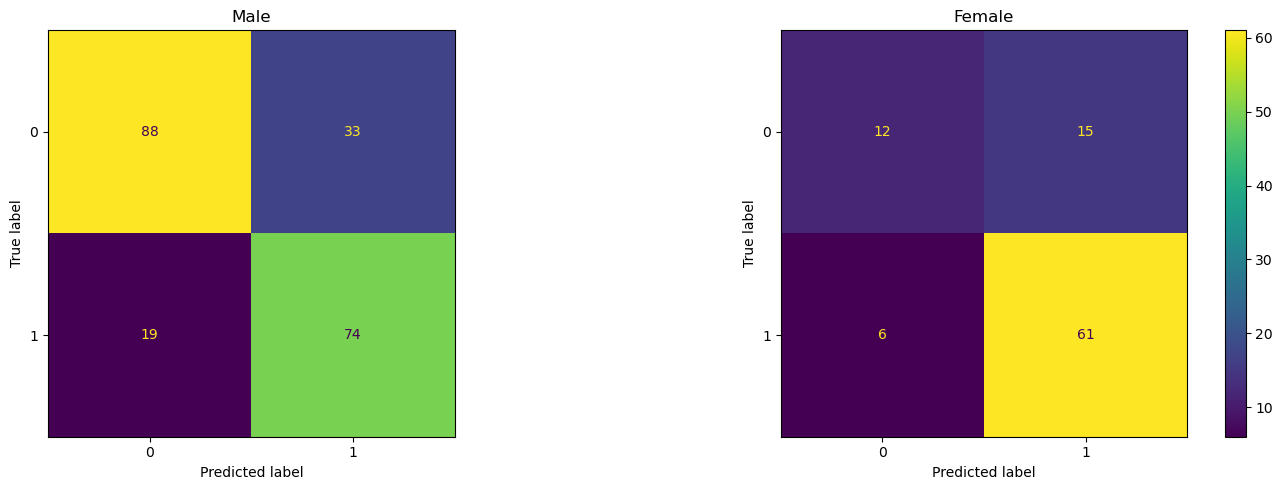

In [51]:
# Confusion Matrix
# Make predictions using test set
ypred_male = nb_male.predict(test_male[inp])
ypred_female = nb_female.predict(test_female[inp])

ytrue_male = test_male[out]
ytrue_female = test_female[out]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot confusion matrix for male 
cm_male = metrics.confusion_matrix(ytrue_male, ypred_male)
disp = metrics.ConfusionMatrixDisplay(cm_male, display_labels=nb_male.classes_)
disp.plot(ax = axes[0],colorbar=False)
axes[0].set_title('Male')

# Plot confusion matrix for female 
cm_female = metrics.confusion_matrix(ytrue_female, ypred_female)
disp = metrics.ConfusionMatrixDisplay(cm_female, display_labels=nb_female.classes_);
disp.plot(ax = axes[1])
axes[1].set_title('Female')

plt.tight_layout()
plt.show()

### Performance indicators
---

- **Male model:**  
  The model achieves a precision of 82% for class 0 (no disease) and 69% for class 1 (disease), with recall values of 73% and 80% respectively. Overall accuracy is 76%. This suggests that the model is balanced and performs well in identifying both classes among male patients.

- **Female model:**  
  For class 1 (disease), the model reaches a high recall of 91% and precision of 80%, indicating strong performance in detecting disease cases. However, the recall for class 0 (no disease) is only 44%, meaning it tends to over-predict disease among female patients. Accuracy is 78%.

These results suggest that the female model predicts disease more often, which may lead to more false positive for healthy individuals. Performance differences between the two models support the idea that sex-specific models can reveal different diagnostic patterns.

---

In [54]:
# Performance indicator
print("Male classification report:")
print(metrics.classification_report(ytrue_male, ypred_male))

print("Female classification report:")
print(metrics.classification_report(ytrue_female, ypred_female))

Male classification report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       121
           1       0.69      0.80      0.74        93

    accuracy                           0.76       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.76      0.76       214

Female classification report:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53        27
           1       0.80      0.91      0.85        67

    accuracy                           0.78        94
   macro avg       0.73      0.68      0.69        94
weighted avg       0.76      0.78      0.76        94



### Decision Boundary
---

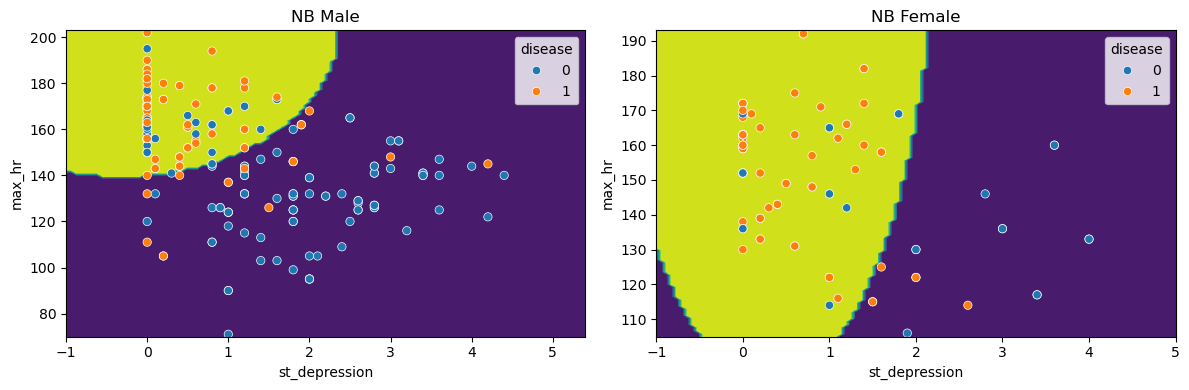

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# # Ploting partitioning of input space
DecisionBoundaryDisplay.from_estimator(nb_male, test_male[inp], response_method='predict', ax = axes[0]);
# plot male test set
sns.scatterplot(x=inp[0], y=inp[1], hue=out, data=test_male, ax = axes[0]);
axes[0].set_title("NB Male")


# # Ploting partitioning of input space
DecisionBoundaryDisplay.from_estimator(nb_female, test_female[inp], response_method='predict', ax = axes[1]);
# plot female test set
sns.scatterplot(x=inp[0], y=inp[1], hue=out, data=test_female, ax = axes[1]);
axes[1].set_title("NB Female")

plt.tight_layout()
plt.show()

## NB FULL
---

### Models
---

In [59]:
# Train the model for male 
nb_male_full= GaussianNB()
nb_male_full.fit(train_male[inp_full], train_male[out]) 

GaussianNB()

In [60]:
# Train the model for female 
nb_female_full= GaussianNB()
nb_female_full.fit(train_female[inp_full], train_female[out]) 

GaussianNB()

### Confusion Matrix
---

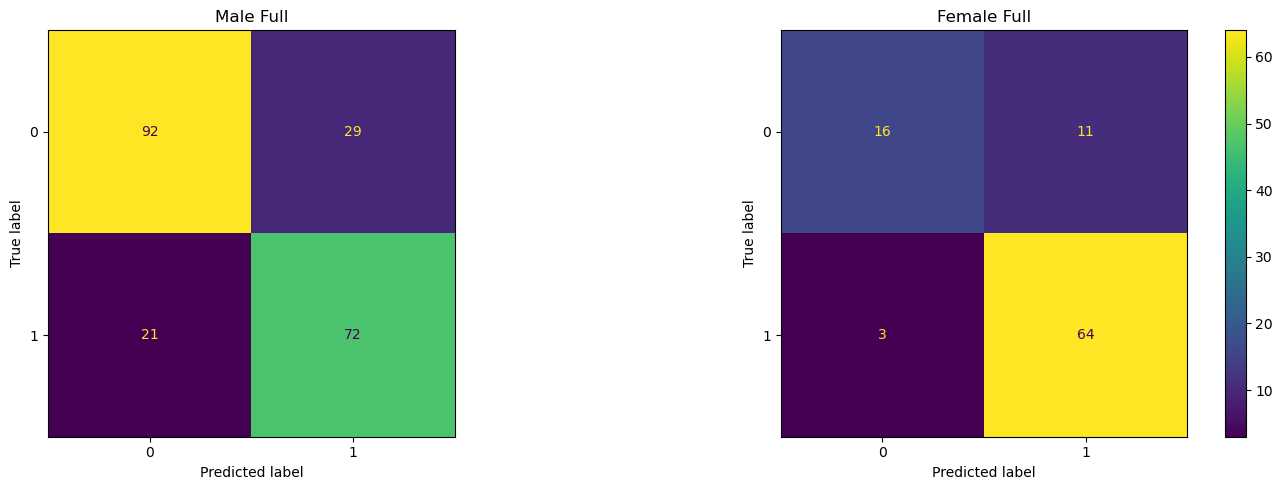

In [62]:
# Confusion Matrix
# Make predictions using test set
ypred_male_full = nb_male_full.predict(test_male[inp_full])
ypred_female_full = nb_female_full.predict(test_female[inp_full])

ytrue_male = test_male[out]
ytrue_female = test_female[out]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot confusion matrix for male 
cm_male_full = metrics.confusion_matrix(ytrue_male, ypred_male_full)
disp = metrics.ConfusionMatrixDisplay(cm_male_full, display_labels=nb_male_full.classes_)
disp.plot(ax = axes[0],colorbar=False)
axes[0].set_title('Male Full')

# Plot confusion matrix for female 
cm_female_full = metrics.confusion_matrix(ytrue_female, ypred_female_full)
disp = metrics.ConfusionMatrixDisplay(cm_female_full, display_labels=nb_female_full.classes_);
disp.plot(ax = axes[1])
axes[1].set_title('Female Full')

plt.tight_layout()
plt.show()

### Performance indicators
---

- **Male model:**  
  The male Naive Bayes model achieves a precision of **0.71** and a recall of **0.77** for class 1 (disease), with an overall accuracy of **0.76**.  

- **Female model:**  
  The female model shows stronger results, with precision of **0.85** and a recall of **0.96, with and an overall accuracy of **0.85**.  
  This suggests the model is more accurate in identifying heart disease among females, with fewer false predictions overall.

---

In [65]:
# Performance indicator
print("Full NB male classification report:")
print(metrics.classification_report(ytrue_male, ypred_male_full))

print("Full NB Female classification report:")
print(metrics.classification_report(ytrue_female, ypred_female_full))

Full NB male classification report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       121
           1       0.71      0.77      0.74        93

    accuracy                           0.77       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.77      0.77      0.77       214

Full NB Female classification report:
              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.85      0.96      0.90        67

    accuracy                           0.85        94
   macro avg       0.85      0.77      0.80        94
weighted avg       0.85      0.85      0.84        94



## KNN: disease vs st_depression, max_hr
---

### Models
---

In [68]:
# Set number of neighbors
K = 5

# Train the model for male dataset 
knn_male = KNeighborsClassifier(n_neighbors=K)
knn_male.fit(train_male[inp],train_male[out])


KNeighborsClassifier()

In [69]:

# Train the model for female dataset 
knn_female = KNeighborsClassifier(n_neighbors=K)
knn_female.fit(train_female[inp],train_female[out])

KNeighborsClassifier()

### Confusion Matrix
---

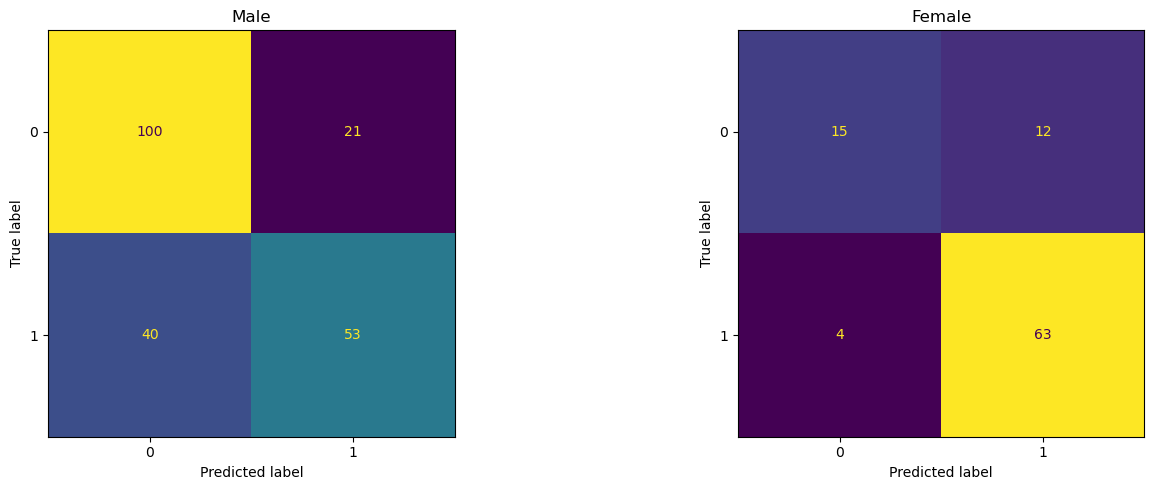

In [71]:
# Make predictions using male test set
ypred_male = knn_male.predict(test_male[inp])
ytrue_male = test_male[out]

# Make predictions using female test set
ypred_female = knn_female.predict(test_female[inp])
ytrue_female= test_female[out]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot confusion matrix for male
cm_male = metrics.confusion_matrix(ytrue_male, ypred_male)
disp = metrics.ConfusionMatrixDisplay(cm_male, display_labels=knn_male.classes_)
disp.plot(ax = axes[0],colorbar=False)
axes[0].set_title('Male')

# Plot confusion matrix for female
cm_female = metrics.confusion_matrix(ytrue_female, ypred_female)
disp = metrics.ConfusionMatrixDisplay(cm_female, display_labels=knn_female.classes_)
disp.plot(ax = axes[1],colorbar=False)
axes[1].set_title('Female')

plt.tight_layout()
plt.show()

### Performance indicators
---

- **Male model:**  
  The male KNN model achieves a precision of **0.92** and a recall of **0.83** for class 1 (disease), with an overall accuracy of **0.89**.  

- **Female model:**  
  The female model performs slightly better overall, with a precision of **0.93** and a recall of **0.97**, reaching an accuracy of **0.93**.  


---


In [74]:
# Performance indicator
print("KNN male classification report:")
print(metrics.classification_report(ytrue_male, ypred_male_full))

print("KNN female classification report:")
print(metrics.classification_report(ytrue_female, ypred_female_full))

KNN male classification report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       121
           1       0.71      0.77      0.74        93

    accuracy                           0.77       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.77      0.77      0.77       214

KNN female classification report:
              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.85      0.96      0.90        67

    accuracy                           0.85        94
   macro avg       0.85      0.77      0.80        94
weighted avg       0.85      0.85      0.84        94



### Decision Boundary
---

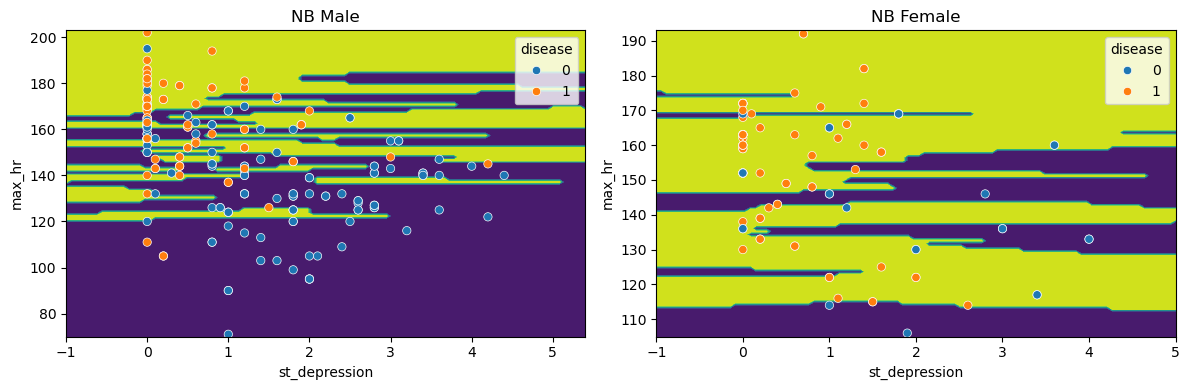

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# # Ploting partitioning of input space
DecisionBoundaryDisplay.from_estimator(knn_male, test_male[inp], response_method='predict', ax = axes[0]);
# plot male test set
sns.scatterplot(x=inp[0], y=inp[1], hue=out, data=test_male, ax = axes[0]);
axes[0].set_title("NB Male")

# # Ploting partitioning of input space
DecisionBoundaryDisplay.from_estimator(knn_female, test_female[inp], response_method='predict', ax = axes[1]);
# plot female test set
sns.scatterplot(x=inp[0], y=inp[1], hue=out, data=test_female, ax = axes[1]);
axes[1].set_title("NB Female")

plt.tight_layout()
plt.show()


## KNN FULL
---

### Models
---

In [79]:
# Fix num of neighbors
K = 3 

# Train the model for male 
knn_male_full= KNeighborsClassifier(n_neighbors=K)
knn_male_full.fit(train_male[inp_full], train_male[out]) 

KNeighborsClassifier(n_neighbors=3)

In [80]:
# Train the model for female 
knn_female_full= KNeighborsClassifier(n_neighbors=K)
knn_female_full.fit(train_female[inp_full], train_female[out]) 

KNeighborsClassifier(n_neighbors=3)

### Confusion Matrix
---

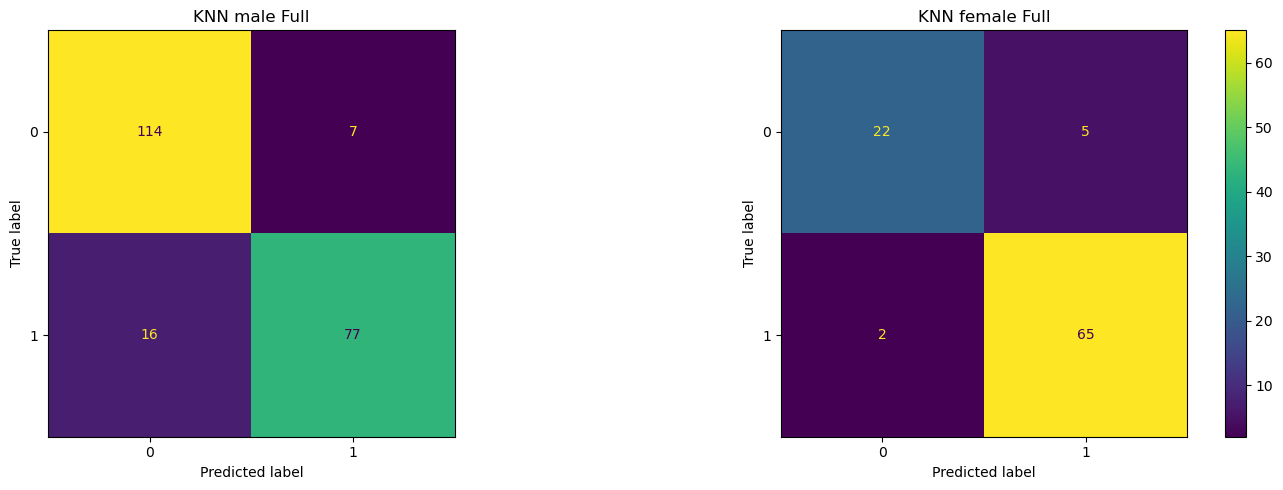

In [82]:
# Confusion Matrix
# Make predictions using test set
ypred_male_full = knn_male_full.predict(test_male[inp_full])
ypred_female_full = knn_female_full.predict(test_female[inp_full])

ytrue_male = test_male[out]
ytrue_female = test_female[out]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot confusion matrix for male 
cm_male_full = metrics.confusion_matrix(ytrue_male, ypred_male_full)
disp = metrics.ConfusionMatrixDisplay(cm_male_full, display_labels=knn_male_full.classes_)
disp.plot(ax = axes[0],colorbar=False)
axes[0].set_title('KNN male Full')

# Plot confusion matrix for female 
cm_female_full = metrics.confusion_matrix(ytrue_female, ypred_female_full)
disp = metrics.ConfusionMatrixDisplay(cm_female_full, display_labels=knn_female_full.classes_);
disp.plot(ax = axes[1])
axes[1].set_title('KNN female Full')

plt.tight_layout()
plt.show()

### Performance indicators
---

- **Male model:**  
  The male Full KNN model achieves a precision of **0.92** and a recall of **0.83** for class 1 (disease), with an overall accuracy of **0.89**.  
  This suggests the model performs well in detecting diseased individuals while keeping false positives relatively low.

- **Female model:**  
  The female Full KNN model shows even stronger results, with a precision of **0.93** and a recall of **0.97**, and an overall accuracy of **0.93**.  
  These metrics indicate that the model is highly effective at identifying heart disease in females, with both high sensitivity and precision.

The very high performance of both models confirms the strong predictive capability of the selected features. However, the female-specific model performs slightly 
better on class 1, reinforcing the importance of using sex-specific classifiers to improve diagnostic accuracy.

---


In [85]:
# Performance indicator
print("Full KNN male classification report:")
print(metrics.classification_report(ytrue_male, ypred_male_full))

print("Full KNN Female classification report:")
print(metrics.classification_report(ytrue_female, ypred_female_full))

Full KNN male classification report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       121
           1       0.92      0.83      0.87        93

    accuracy                           0.89       214
   macro avg       0.90      0.89      0.89       214
weighted avg       0.89      0.89      0.89       214

Full KNN Female classification report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.93      0.97      0.95        67

    accuracy                           0.93        94
   macro avg       0.92      0.89      0.91        94
weighted avg       0.93      0.93      0.92        94

